In [1]:
# KNN classification

# We will use the iris dataset. 
# This is perhaps the best known database to be found in the pattern recognition literature. 
# Classify the Iris plant based on the 4 features:
# sepal length in cm
# sepal width in cm
# petal length in cm
# petal width in cm
# To one of these classes:
# -- Iris Setosa
# -- Iris Versicolour
# -- Iris Virginica

from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from helper_funcs import plot_decision_regions

# Load dataset (this comes directly in  sklearn.datasets)
# We will only load 2 features: petal length and petal width
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print(f'X shape: {X.shape}')
print('Class labels:', np.unique(y))

X shape: (150, 2)
Class labels: [0 1 2]


In [2]:
# Split the data to training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [3]:
# Normalization step
# Normalization (or Standardization) is important for distance-based classifiers

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/Users/izavits/workspace/msc_datascience/helpe

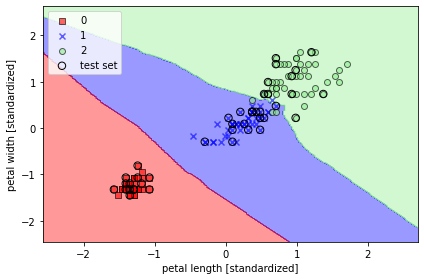

In [4]:
# Classification

# Note:
# Here are some metrics intended for real-valued vector spaces:
# euclidean: sqrt(sum((x - y)^2))
# manhattan: sum(|x - y|)
# chebyshev: max(|x - y|)
# minkowski: sum(|x - y|^p)^(1/p) 
# Note for minkowski: when p=1, equivalent to manhattan_distance, when p=2 equivalent to euclidean

# See more:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()